<a href="https://colab.research.google.com/github/Jeffreyarukwe/PhishHunt/blob/main/AI_Driven_Phishing_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PhishHunt: Machine Learning-Based Phishing Detection System

### Jeffrey Arukwe

# Step 1: Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Step 2: Load the dataset

https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning

In [2]:
data = pd.read_csv("Phishing_Legitimate_full.csv")

In [3]:
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
data.tail()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
9999,10000,3,1,2,52,3,0,0,0,0,...,0,0,0,1,1,1,1,1,1,0


# Step 3: Dataset analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [6]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.max(axis=0)

id                                    10000.0
NumDots                                  21.0
SubdomainLevel                           14.0
PathLevel                                18.0
UrlLength                               253.0
NumDash                                  55.0
NumDashInHostname                         9.0
AtSymbol                                  1.0
TildeSymbol                               1.0
NumUnderscore                            18.0
NumPercent                               19.0
NumQueryComponents                       23.0
NumAmpersand                             22.0
NumHash                                   1.0
NumNumericChars                         111.0
NoHttps                                   1.0
RandomString                              1.0
IpAddress                                 1.0
DomainInSubdomains                        1.0
DomainInPaths                             1.0
HttpsInHostname                           0.0
HostnameLength                    

In [8]:
data.drop("id", axis=1, inplace=True)

In [9]:
data.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


<Axes: >

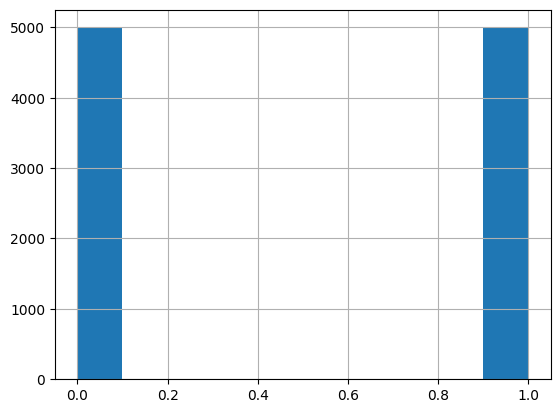

In [10]:
data['CLASS_LABEL'].hist()

# Step 4: Splitting data

In [11]:
X = data.drop("CLASS_LABEL", axis=1)
y = data["CLASS_LABEL"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
X_test.shape
# X_train.shape

(2500, 48)

# Step 5: Training ML Algorithms (KNN, Logistic Regression and Random Forest)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
lr = LogisticRegression()

In [28]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
rfc = RandomForestClassifier()

In [16]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
predictions = rfc.predict(X_test)

# Step 6: Model evaluation metrics

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [50]:
accuracy_knn = accuracy_score(y_test, knn.predict(X_test))
precision_knn = precision_score(y_test, knn.predict(X_test))
recall_knn = recall_score(y_test, knn.predict(X_test))
f1_score_knn = f1_score(y_test, knn.predict(X_test))

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_score_knn)

Accuracy: 0.8728
Precision: 0.8570359281437125
Recall: 0.9001572327044025
F1-score: 0.8780674846625767


In [51]:
accuracy_lr = accuracy_score(y_test, lr.predict(X_test))
precision_lr = precision_score(y_test, lr.predict(X_test))
recall_lr = recall_score(y_test, lr.predict(X_test))
f1_score_lr = f1_score(y_test, lr.predict(X_test))

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_score_lr)

Accuracy: 0.9276
Precision: 0.9231962761830876
Recall: 0.9355345911949685
F1-score: 0.929324482623975


In [52]:
accuracy_rfc = accuracy_score(y_test, rfc.predict(X_test))
precision_rfc = precision_score(y_test, rfc.predict(X_test))
recall_rfc = recall_score(y_test, rfc.predict(X_test))
f1_score_rfc = f1_score(y_test, rfc.predict(X_test))

print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1-score:", f1_score_rfc)

Accuracy: 0.984
Precision: 0.9842767295597484
Recall: 0.9842767295597484
F1-score: 0.9842767295597484


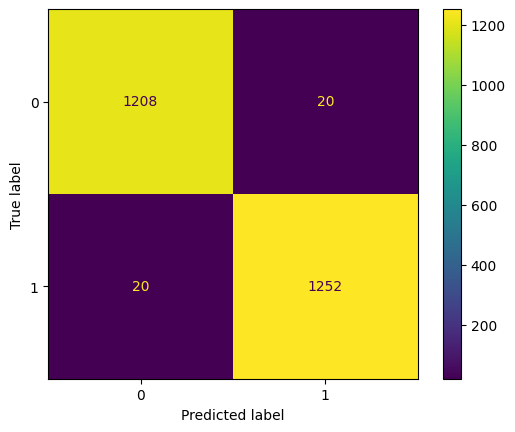

In [61]:
cm = confusion_matrix(y_test, rfc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

# Step 7: Saving the best model

The Random Forest model performs best for this dataset.

In [53]:
import pickle

In [54]:
model_file = "phishing_detector.pkl"

In [55]:
with open(model_file, "wb") as file:
  pickle.dump(rfc, file)